In [1]:
import os
import joblib
import csv
import glob

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import scipy
import scipy.optimize as opt

import DAQTools
import pycrp

No local midas libary installed


/Users/jasonyuan/Desktop/Physics/Thesis/Code/pycrp/_event.py:33: UserWarning: No MIDAS reader found. See readme for how to install a python MIDAS interface.
  warnings.warn("No MIDAS reader found. See readme for how to install a python MIDAS interface.")


Sample Testing — Initial parsing code

In [2]:
# Read in the data file and convert into numpy array
data_file = "/Users/jasonyuan/Desktop/Physics/Thesis/Data/Time Distribution/Nov 4/Test_Time_3_4__6_6.csv"
channels = 64

df = pd.read_csv(data_file, sep=';', header=None)
data_np = df.to_numpy()

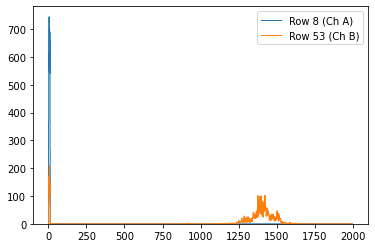

In [3]:
%matplotlib inline

# Plot the time spectrum data
# Bin width is 37 ps

nbins = len(df.columns)
bins = np.arange(1,nbins+2,1)
end = 2000 # data_np.shape[1]

plt.figure()
plt.stairs(data_np[7,:end],bins[:end+1],label='Row 8 (Ch A)')
plt.stairs(data_np[52,:end],bins[:end+1],label='Row 53 (Ch B)')
plt.legend()


In [83]:
# Fitting a Gaussian curve to the signals of interest
def gauss(x,A,mu,sigma):
    return A*np.exp(-(x-mu)**2/sigma**2)

# Parameters for index 7 data
bin_centers = (bins[:-1] + bins[1:])/2
param,covar = opt.curve_fit(gauss, bin_centers, data_np[7,:])

print(param)
print(covar)

%matplotlib inline 

plt.figure()
plt.stairs(data_np[7,:],bins,label='Row 8 (Ch A)')
plt.plot(bin_centers, gauss(bin_centers, param[0], param[1], param[2]),label='Fitted Gauss')
plt.xlim(0,40)
plt.legend()

NameError: name 'bins' is not defined

[  52.42395939 1408.23169188   82.35048881]
[[ 9.67397386e-02  2.58314700e-08 -1.01318100e-01]
 [ 2.58314700e-08  1.59169711e-01 -4.07285981e-08]
 [-1.01318100e-01 -4.07285981e-08  3.18339423e-01]]


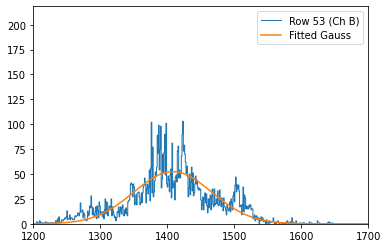

In [45]:
# Parameters for index 52 data
adjusted_data = np.copy(data_np[52,:])
adjusted_data[:20] = 0.
guess = [100,1400,200]
param_2,covar_2 = opt.curve_fit(gauss, bin_centers, adjusted_data, p0=guess)


print(param_2)
print(covar_2)
# print(len(adjusted_data[1000:2000]))
# print(bin_centers[1000:2000])

%matplotlib inline 

plt.figure()
plt.stairs(data_np[52,:],bins,label='Row 53 (Ch B)')
# plt.scatter(bin_centers[1000:2000], adjusted_data[1000:2000], label='Row 53 Scatter')
plt.plot(bin_centers, gauss(bin_centers, param_2[0], param_2[1], param_2[2]),label='Fitted Gauss')
plt.xlim(1200,1700)
plt.legend()

Analyzing Data Collected from Nov 8

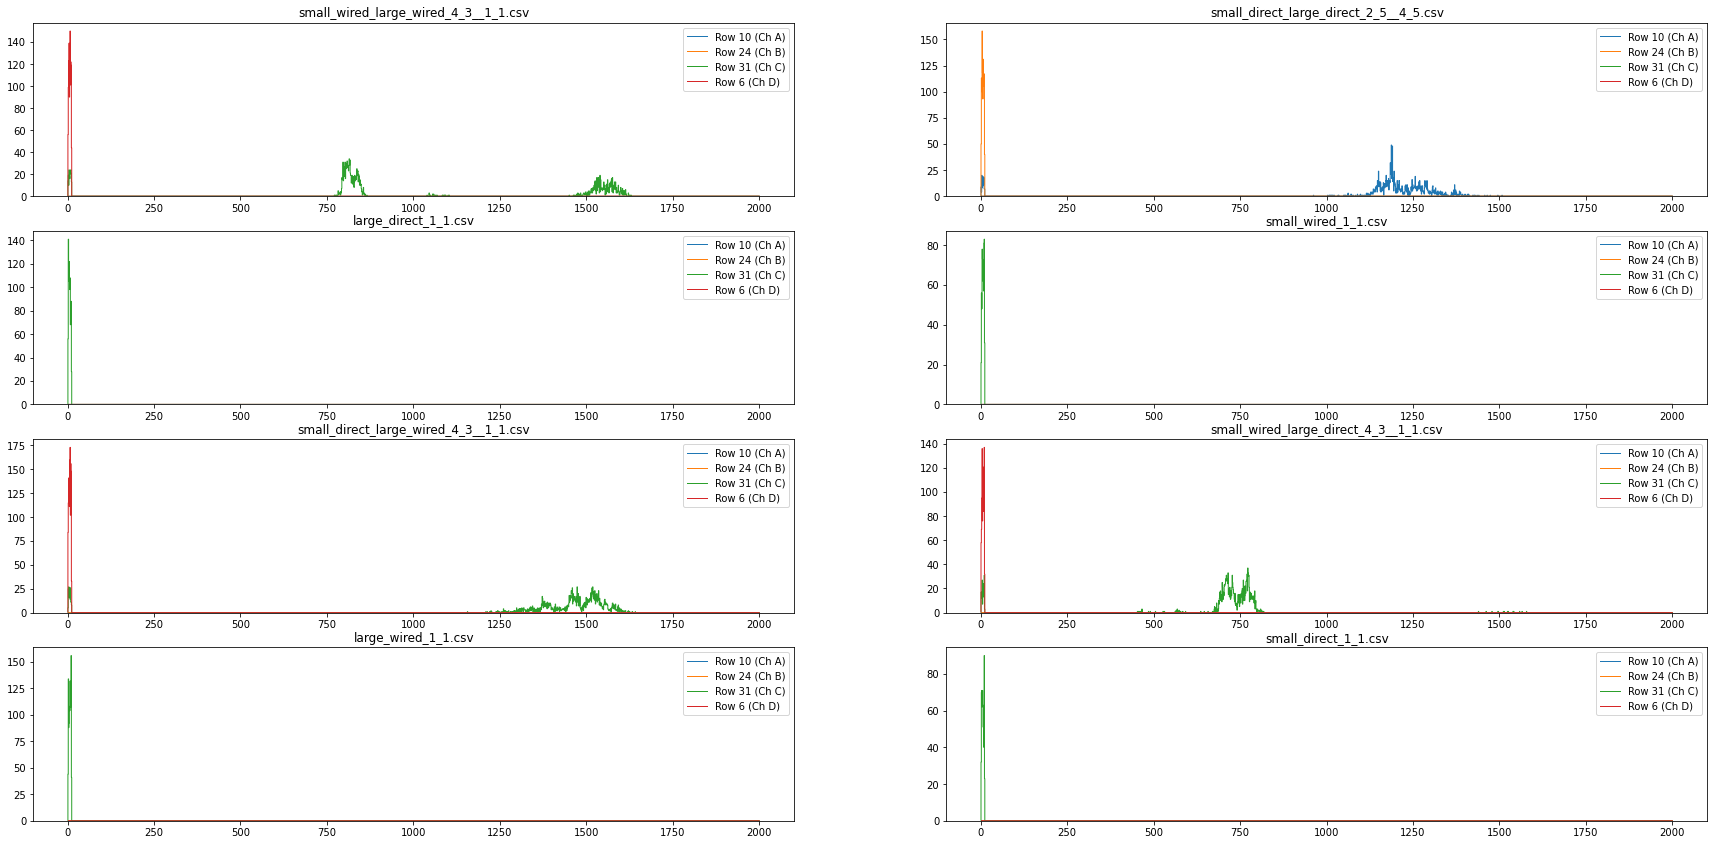

In [66]:
# Read input data -- Should be on indices 9 and 23 and 30 and 5
data_dir = '/Users/jasonyuan/Desktop/Physics/Thesis/Data/Time Distribution/Nov 8'
channels = 64
count = 0

for f in os.listdir('/Users/jasonyuan/Desktop/Physics/Thesis/Data/Time Distribution/Nov 8'):
    if f == '.DS_Store':
        continue
    count += 1

%matplotlib inline

plt.figure(figsize=(30,30))

for n, file in enumerate(os.listdir(data_dir),1):
    if file == '.DS_Store': 
        continue
    else:
        data_file = data_dir + '/' + file
        df = pd.read_csv(data_file, sep=';', header=None)
        data_np = df.to_numpy()

        nbins = len(df.columns)
        bins = np.arange(1,nbins+2,1)
        end = 2000 # data_np.shape[1]

        plt.subplot(count,2,n)
        plt.stairs(data_np[9,:end],bins[:end+1],label='Row 10 (Ch A)')
        plt.stairs(data_np[23,:end],bins[:end+1],label='Row 24 (Ch B)')
        plt.stairs(data_np[30,:end],bins[:end+1],label='Row 31 (Ch C)')
        plt.stairs(data_np[5,:end],bins[:end+1],label='Row 6 (Ch D)')
        plt.legend()
        plt.title(file)


Analyzing Data from Nov - 18

In [4]:
csv_file = '/Users/jasonyuan/Desktop/Physics/Thesis/Data/Overall/Nov 18/1.data'

df = pd.read_csv(csv_file, sep=';',on_bad_lines='warn')
# data_numpy = df.to_numpy()

b'Skipping line 79803: expected 336 fields, saw 502\n'


In [46]:
df

,ID_CLUSTER,CLUSTER_RUN_Timecode_ns,CLUSTER_Timecode_ns,NEventsInCluster,ASIC_0,EventCounter_0,RUN_EventTimeCodeLSB_0,RUN_EventTimecode_ns_0,T0_to_Event_Timecode_0,T0_to_Event_Timecode_ns_0,...,RELATIVETIME_1_22,RELATIVETIME_1_23,RELATIVETIME_1_24,RELATIVETIME_1_25,RELATIVETIME_1_26,RELATIVETIME_1_27,RELATIVETIME_1_28,RELATIVETIME_1_29,RELATIVETIME_1_30,RELATIVETIME_1_31
0,1,4939150,62345900,1,0,0,197566,4939150,2493836,62345900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,14939850,142351500,1,0,1,597594,14939850,5694060,142351500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,24940550,222357050,1,0,2,997622,24940550,8894282,222357050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,34941250,302362750,1,0,3,1397650,34941250,12094510,302362750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,44941950,382368300,1,0,4,1797678,44941950,15294732,382368300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99982,99984,1110402354850,24871623550,1,0,111111,44416094194,1110402354850,994864942,24871623550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99983,99985,1110412355550,24951629150,1,0,111112,44416494222,1110412355550,998065166,24951629150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99984,99986,1110422356250,25031634700,1,0,111113,44416894250,1110422356250,1001265388,25031634700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99985,99987,1110432356950,25111640250,1,0,111114,44417294278,1110432356950,1004465610,25111640250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
%matplotlib inline
# Fitting a Gaussian curve to the signals of interest
def gauss(x,A,mu,sigma):
    return A*np.exp(-(x-mu)**2/sigma**2)

def getCoarseFineColumns(channels):
    coarse_basename = 'COARSE_0_{}'
    fine_basename = 'FINE_0_{}'
    hit_basename = 'HIT_0_{}'
    entries = {}

    for ch in channels:
        if ch not in entries:
            entries[ch] = [coarse_basename.format(ch),fine_basename.format(ch),hit_basename.format(ch)]
                                                                                                                         
    return entries

def Sturge(N):
    return 1+3.322*np.log(N)

def getTOF(channels,df):

    """
    Get time of flight between two channels. This means that channels should be an input with two array elements.
    Implicitly, assume that the faster channel is first in the array and the slower channel is second in the array.
    """

    entries = getCoarseFineColumns(channels)

    # Get rid of all non-matching channels
    # Filtered df should be in order: HIT_CH1, HIT_CH2, COARSE_CH1, FINE_CH1, COARSE_CH2, FINE_CH2
    df_filter = df[[entries[channels[0]][2],entries[channels[1]][2],entries[channels[0]][0],entries[channels[0]][1],entries[channels[1]][0],entries[channels[1]][1]]]
    np_filter = df_filter.to_numpy()
    np_filter = np.delete(np_filter,np.where(np_filter[:,0]==0),axis=0)
    np_filter = np.delete(np_filter,np.where(np_filter[:,1]==0),axis=0)
    print(np_filter)
    min_fine_0 = np_filter[:,3].min()
    max_fine_0 = np_filter[:,3].max()
    min_fine_1 = np_filter[:,5].min()
    max_fine_1 = np_filter[:,5].max()

    # fine_CH = df[[entries[channels[0]][2],entries[channels[0]][1]]].to_numpy()
    # fine_CH = np.delete(fine_CH,np.where(fine_CH[:,0]==0),axis=0)
    # min_fine_0 = np.min(fine_CH[:,1])

    # fine_CH = df[[entries[channels[1]][2],entries[channels[1]][1]]].to_numpy()
    # fine_CH = np.delete(fine_CH,np.where(fine_CH[:,0]==0),axis=0)
    # min_fine_1 = np.min(fine_CH[:,1])

    # max_fine_0 = np.max(df[entries[channels[0]][1]])
    # max_fine_1 = np.max(df[entries[channels[1]][1]])

    alfa_0 = 25/(max_fine_0-min_fine_0)           # In ns per step
    alfa_1 = 25/(max_fine_1-min_fine_1)           # In ns per step

    print(alfa_0,alfa_1)

    # fine_0 = df[entries[channels[0]][1]].to_numpy()

    fine_0 = np_filter[:,3]
    fine_0 = (fine_0-min_fine_0)*alfa_0

    # fine_1 = df[entries[channels[1]][1]].to_numpy()

    fine_1 = np_filter[:,5]
    fine_1 = (fine_1-min_fine_1)*alfa_1 

    # coarse_0 = df[entries[channels[0]][0]].to_numpy()
    # coarse_1 = df[entries[channels[1]][0]].to_numpy()

    coarse_0 = np_filter[:,2]
    coarse_1 = np_filter[:,4]

    tof = ((coarse_0)*25-fine_0) - ((coarse_1)*25-fine_1)
    
    return tof, coarse_0, coarse_1, fine_0, fine_1 


0.06756756756756757 0.03526093088857546


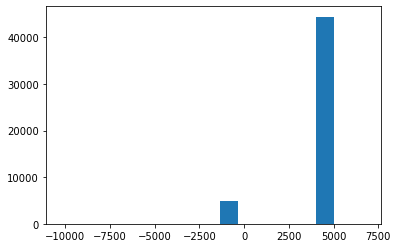

In [68]:
# entries = getCoarseFineColumns([26,4])

# min_fine_CH26 = np.min(df[entries[26][1]])
# min_fine_CH4 = np.min(df[entries[4][1]])

# max_fine_CH26 = np.max(df[entries[26][1]])
# max_fine_CH4 = np.max(df[entries[4][1]])

# alfa_CH26 = 25/(max_fine_CH26-min_fine_CH26)        # In ns per step
# alfa_CH4 = 25/(max_fine_CH4-min_fine_CH4)           # In ns per stepp

# fine_CH26 = df[entries[26][1]].to_numpy()
# fine_CH26 = (fine_CH26-min_fine_CH26)*alfa_CH26

# fine_CH4 = df[entries[4][1]].to_numpy()
# fine_CH4 = (fine_CH4-min_fine_CH4)*alfa_CH4 

# coarse_CH26 = df[entries[26][0]].to_numpy()
# # coarse_CH26 = coarse_CH26*25                        # Multiply by 25 ns to convert from counts to time
# coarse_CH4 = df[entries[4][0]].to_numpy()
# # coarse_CH4 = coarse_CH4*25

# # tof = (coarse_CH4+fine_CH4) - (coarse_CH26+fine_CH26)
# tof = ((coarse_CH4+1)*25-fine_CH4) - ((coarse_CH26+1)*25-fine_CH26)

tof,_,_,_,_ = getTOF([26,4],df)
# hist, bin_edges = np.histogram(tof,bins=int(Sturge(len(tof))))
hist, bin_edges = np.histogram(tof,bins=10)

plt.figure()
plt.bar(bin_edges[:-1],hist,width=1000,align='edge')
# plt.hist(tof,100)
plt.show()

In [69]:
print(np.all(fine_CH26 <= 25))
print(len(tof))
print(hist)
print(len(hist),len(bin_edges[:-1]))
print(bin_edges[:-1])
print(np.arange(len(hist)))

NameError: name 'fine_CH26' is not defined

Data from Nov 23

0.03644314868804665 0.036390101892285295


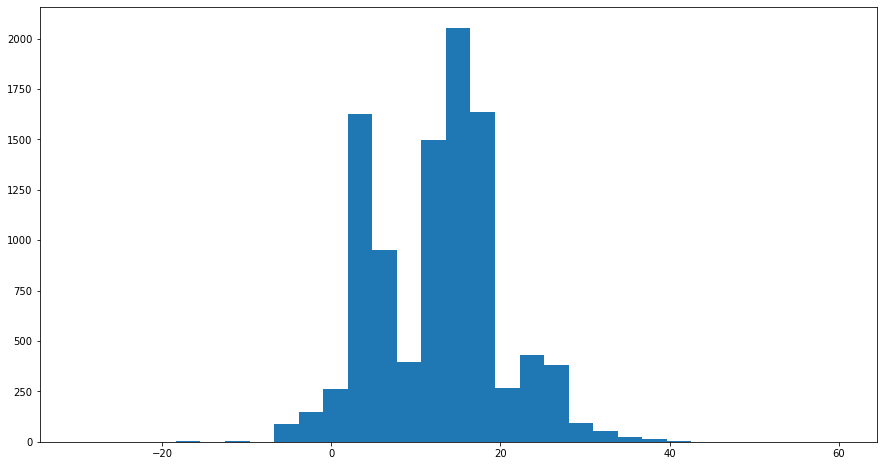

In [70]:
%matplotlib inline

data_dir = '/Users/jasonyuan/Desktop/Physics/Thesis/Data/Overall/Nov 23'
data_1 = data_dir + '/1.data'
data_2 = data_dir + '/2.data'
data_3 = data_dir + '/3.data'

tof_1, coarse_30, coarse_20, fine_30, fine_20 = getTOF([30,20],pd.read_csv(data_1,sep=';',on_bad_lines='warn'))
hist_1, bin_edges_1 = np.histogram(tof_1,bins=int(Sturge(len(tof_1))))

# tof_2 = getTOF([30,20],pd.read_csv(data_2,sep=';',on_bad_lines='warn'))
# hist_2, bin_edges_2 = np.histogram(tof_2,bins=int(Sturge(len(tof_2))))

# tof_3 = getTOF([30,20],pd.read_csv(data_3,sep=';',on_bad_lines='warn'))
# hist_3, bin_edges_3 = np.histogram(tof_3,bins=int(Sturge(len(tof_3))))

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
n1, nbins_1, _ = plt.hist(tof_1,int(Sturge(len(tof_1))),range=(-30,60))
# plt.subplot(1,3,2)
# n2, nbins_2, _ = plt.hist(tof_2,int(Sturge(len(tof_2))),range=(-30,60))
# plt.subplot(1,3,3)
# n3, nbins_3, _ = plt.hist(tof_3,int(Sturge(len(tof_3))),range=(-30,60))
plt.show()

['CH_0_20', 'CH_0_30']


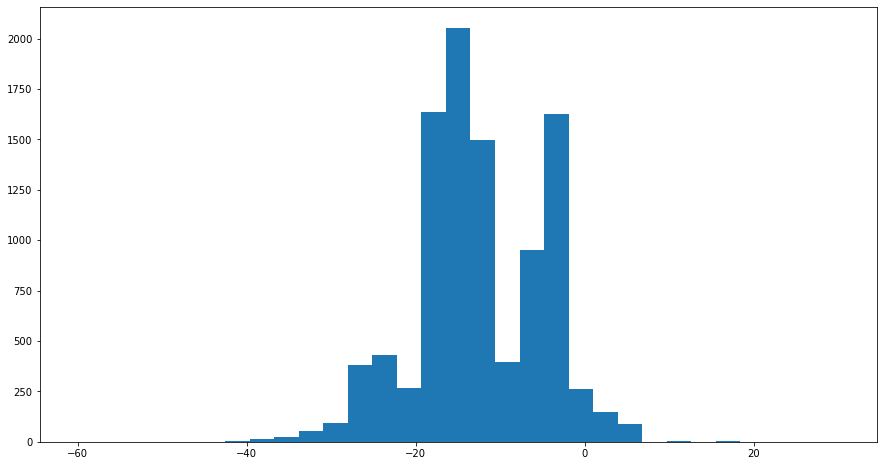

In [10]:
%matplotlib inline

data_dir = '/Users/jasonyuan/Desktop/Physics/Thesis/Data/Overall/Nov 23'
data_1 = data_dir + '/1.data'
data_2 = data_dir + '/2.data'
data_3 = data_dir + '/3.data'

tof_1, coarse_30, coarse_20, fine_30, fine_20 = DAQTools.getTOF([],pd.read_csv(data_1,sep=';',on_bad_lines='warn'))
hist_1, bin_edges_1 = np.histogram(tof_1,bins=int(DAQTools.Sturge(len(tof_1))))

# tof_2 = getTOF([30,20],pd.read_csv(data_2,sep=';',on_bad_lines='warn'))
# hist_2, bin_edges_2 = np.histogram(tof_2,bins=int(Sturge(len(tof_2))))

# tof_3 = getTOF([30,20],pd.read_csv(data_3,sep=';',on_bad_lines='warn'))
# hist_3, bin_edges_3 = np.histogram(tof_3,bins=int(Sturge(len(tof_3))))

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
n1, nbins_1, _ = plt.hist(tof_1,int(DAQTools.Sturge(len(tof_1))),range=(-60,30))
# plt.subplot(1,3,2)
# n2, nbins_2, _ = plt.hist(tof_2,int(Sturge(len(tof_2))),range=(-30,60))
# plt.subplot(1,3,3)
# n3, nbins_3, _ = plt.hist(tof_3,int(Sturge(len(tof_3))),range=(-30,60))
plt.show()

In [71]:
print(nbins_1[np.argmax(n1)])
# print(nbins_2[np.argmax(n2)])
# print(nbins_3[np.argmax(n3)])

13.548387096774192


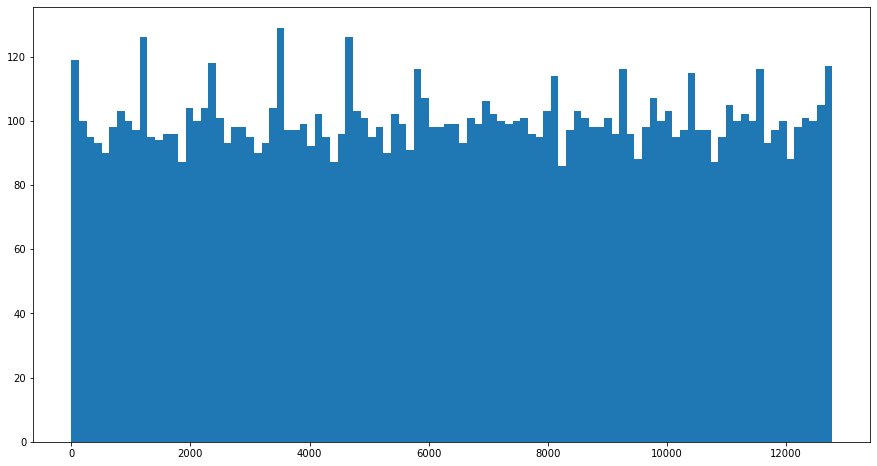

In [72]:
plt.figure(figsize=(15,8))
plt.hist(coarse_30*25,100)
plt.show()

In [73]:
df = pd.read_csv(data_1,sep=';',on_bad_lines='warn')
print(df)

       ID_CLUSTER  CLUSTER_RUN_Timecode_ns  CLUSTER_Timecode_ns  \
0               1                 11299650             98798550   
1               2                 23800525            198805450   
2               3                 36301400            298812400   
3               4                 48802250            398819350   
4               5                 61303125            498826350   
...           ...                      ...                  ...   
10000       10001             138895903175          10590257150   
10001       10002             138908404050          10690264150   
10002       10003             138920904925          10790271000   
10003       10004             138933405775          10890277850   
10004       10005             138945906650          10990284850   

       NEventsInCluster  ASIC_0  EventCounter_0  RUN_EventTimeCodeLSB_0  \
0                     1       0               0                  451986   
1                     1       0              

Nov 25 Data Processing

b'Skipping line 13761: expected 336 fields, saw 502\nSkipping line 13763: expected 336 fields, saw 502\n'
b'Skipping line 63599: expected 336 fields, saw 502\nSkipping line 63608: expected 336 fields, saw 502\nSkipping line 63613: expected 336 fields, saw 502\n'
b'Skipping line 93026: expected 336 fields, saw 502\nSkipping line 93029: expected 336 fields, saw 502\n'
b'Skipping line 165376: expected 336 fields, saw 502\nSkipping line 165806: expected 336 fields, saw 502\n'


[[  1   1 114 412 114 780]
 [  1   1 259 398 259 775]
 [  1   1 404 387 404 772]
 ...
 [  1   1 103 378 103 696]
 [  1   1 248 310 248 630]
 [  1   1 393 291 393 755]]
0.036337209302325583 0.03597122302158273


b'Skipping line 2851: expected 336 fields, saw 502\n'


[[  1   1 217 884 216 484]
 [  1   1 361 685 360 320]
 [  1   1 506 644 506 981]
 ...
 [  1   1 442 925 441 595]
 [  1   1  75 913  74 505]
 [  1   1 220 869 219 460]]
0.036390101892285295 0.03602305475504323


b'Skipping line 81559: expected 336 fields, saw 502\n'
b'Skipping line 82228: expected 336 fields, saw 502\n'
b'Skipping line 84126: expected 336 fields, saw 502\nSkipping line 84159: expected 336 fields, saw 502\nSkipping line 84522: expected 336 fields, saw 502\nSkipping line 84593: expected 336 fields, saw 502\n'
b'Skipping line 97295: expected 336 fields, saw 502\n'


[[  1   1 149 746 148 360]
 [  1   1 294 751 293 388]
 [  1   1 439 640 438 357]
 ...
 [  1   1 407 762 406 457]
 [  1   1  40 799  39 420]
 [  1   1 185 723 184 316]]
0.036337209302325583 0.03602305475504323


b'Skipping line 6173: expected 336 fields, saw 502\nSkipping line 7594: expected 336 fields, saw 502\n'
b'Skipping line 21584: expected 336 fields, saw 502\n'
b'Skipping line 40666: expected 336 fields, saw 502\n'
b'Skipping line 84266: expected 336 fields, saw 502\n'


[[  1   1 154 717 153 441]
 [  1   1 299 640 298 367]
 [  1   1 427 368 427 904]
 ...
 [  1   1 371 575 370 313]
 [  1   1 500 523 500 958]
 [  1   1 424 910 423 705]]
0.03644314868804665 0.03602305475504323


b'Skipping line 13209: expected 336 fields, saw 502\n'
b'Skipping line 21450: expected 336 fields, saw 502\nSkipping line 21535: expected 336 fields, saw 502\nSkipping line 21554: expected 336 fields, saw 502\nSkipping line 21605: expected 336 fields, saw 502\nSkipping line 21673: expected 336 fields, saw 502\nSkipping line 21700: expected 336 fields, saw 502\nSkipping line 21701: expected 336 fields, saw 502\nSkipping line 21713: expected 336 fields, saw 502\nSkipping line 21714: expected 336 fields, saw 502\nSkipping line 21715: expected 336 fields, saw 502\nSkipping line 21716: expected 336 fields, saw 502\nSkipping line 21717: expected 336 fields, saw 502\nSkipping line 21718: expected 336 fields, saw 502\nSkipping line 21719: expected 336 fields, saw 502\nSkipping line 21720: expected 336 fields, saw 502\nSkipping line 21729: expected 336 fields, saw 502\nSkipping line 21730: expected 336 fields, saw 502\nSkipping line 21731: expected 336 fields, saw 502\nSkipping line 21733: expe

[[  1   1   2 913   2 927]
 [  1   1 292 744 292 762]
 [  1   1 217 730 217 739]
 ...
 [  1   1 106 910 106 919]
 [  1   1 388 736 388 748]
 [  1   1 236 392 236 405]]
0.03654970760233918 0.036231884057971016


b'Skipping line 42615: expected 336 fields, saw 502\nSkipping line 42616: expected 336 fields, saw 502\nSkipping line 42620: expected 336 fields, saw 502\nSkipping line 42622: expected 336 fields, saw 502\nSkipping line 42623: expected 336 fields, saw 502\nSkipping line 42624: expected 336 fields, saw 502\nSkipping line 42625: expected 336 fields, saw 502\nSkipping line 42629: expected 336 fields, saw 502\nSkipping line 42633: expected 336 fields, saw 502\nSkipping line 42637: expected 336 fields, saw 502\nSkipping line 42638: expected 336 fields, saw 502\nSkipping line 42686: expected 336 fields, saw 502\nSkipping line 42687: expected 336 fields, saw 502\nSkipping line 42688: expected 336 fields, saw 502\nSkipping line 42689: expected 336 fields, saw 502\nSkipping line 42690: expected 336 fields, saw 502\nSkipping line 42691: expected 336 fields, saw 502\nSkipping line 42692: expected 336 fields, saw 502\nSkipping line 42693: expected 336 fields, saw 502\nSkipping line 42697: expected

[[  1   1 288 620 288 805]
 [  1   1 433 503 433 690]
 [  1   1  66 425  66 606]
 ...
 [  1   1  35 574  35 766]
 [  1   1 105 382 105 564]
 [  1   1 172 464 172 643]]
0.03644314868804665 0.03597122302158273


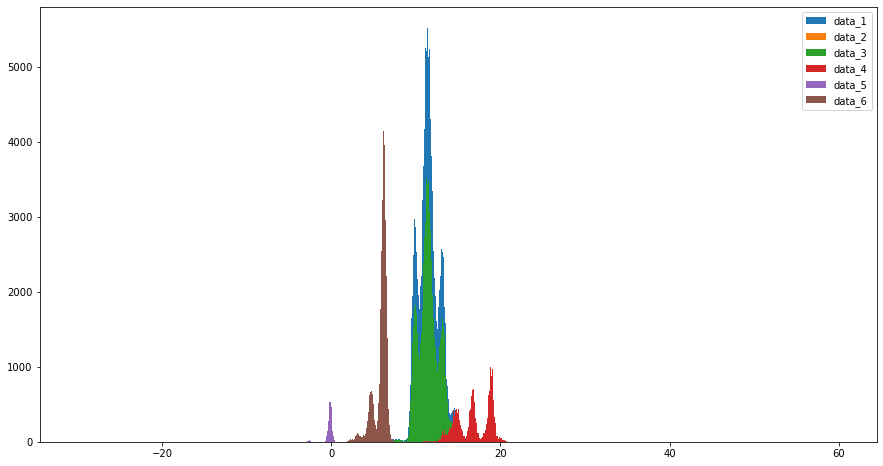

In [5]:
%matplotlib inline

data_dir = '/Users/jasonyuan/Desktop/Physics/Thesis/Data/Overall/Nov 25'
data_1 = data_dir + '/1.data'
data_2 = data_dir + '/2.data'
data_3 = data_dir + '/3.data'
data_4 = data_dir + '/4.data'
data_5 = data_dir + '/5.data'
data_6 = data_dir + '/6.data'

tof_1, coarse_30, coarse_20, fine_30, fine_20 = getTOF([30,22],pd.read_csv(data_1,sep=';',on_bad_lines='warn'))
hist_1, bin_edges_1 = np.histogram(tof_1,bins=int(Sturge(len(tof_1))))

tof_2,_,_,_,_ = getTOF([30,22],pd.read_csv(data_2,sep=';',on_bad_lines='warn'))
hist_2, bin_edges_2 = np.histogram(tof_2,bins=int(Sturge(len(tof_2))))

tof_3,_,_,_,_ = getTOF([30,22],pd.read_csv(data_3,sep=';',on_bad_lines='warn'))
hist_3, bin_edges_3 = np.histogram(tof_3,bins=int(Sturge(len(tof_3))))

tof_4,course_30,course_20,_,_ = getTOF([30,22],pd.read_csv(data_4,sep=';',on_bad_lines='warn'))
hist_4, bin_edges_4 = np.histogram(tof_4,bins=int(Sturge(len(tof_4))))

tof_5,_,_,_,_ = getTOF([30,22],pd.read_csv(data_5,sep=';',on_bad_lines='warn'))
hist_5, bin_edges_5 = np.histogram(tof_5,bins=int(Sturge(len(tof_5))))

tof_6,_,_,_,_ = getTOF([30,22],pd.read_csv(data_6,sep=';',on_bad_lines='warn'))
hist_6, bin_edges_6 = np.histogram(tof_6,bins=int(Sturge(len(tof_6))))

plt.figure(figsize=(15,8))

plt.subplot(1,1,1)
n1, nbins_1, _ = plt.hist(tof_1,int(Sturge(len(tof_1)))+1000,range=(-30,60),fill=True,label='data_1')
n2, nbins_2, _ = plt.hist(tof_2,int(Sturge(len(tof_2)))+1000,range=(-30,30),fill=True,label='data_2')
n3, nbins_3, _ = plt.hist(tof_3,int(Sturge(len(tof_3)))+1000,range=(-30,60),fill=True,label='data_3')
n4, nbins_4, _ = plt.hist(tof_4,int(Sturge(len(tof_4)))+1000,range=(-30,60),fill=True,label='data_4')
# plt.subplot(1,3,2)
n5, nbins_5, _ = plt.hist(tof_5,int(Sturge(len(tof_5)))+1000,range=(-30,60),fill=True,label='data_5')
# plt.subplot(1,3,3)
n6, nbins_6, _ = plt.hist(tof_6,int(Sturge(len(tof_6)))+1000,range=(-30,60),fill=True,label='data_6')

# bin_centers = (nbins_2[:-1] + nbins_2[1:])/2
# param,covar = opt.curve_fit(gauss, bin_centers, n2, p0=[12000,10,0.5])
# plt.plot(bin_centers,gauss(bin_centers,param[0],param[1],param[2]),label='Fit to ToF data')

plt.legend()

plt.show()

In [68]:
print(n2.sum())
print(len(tof_2))
print(hist_2.sum())

46789.0
46831
46831


In [54]:
df_4 = pd.read_csv(data_1,sep=';',on_bad_lines='warn')
print(df_4[['HIT_0_30','HIT_0_22','COARSE_0_30','COARSE_0_22']])
print(np.sum(df_4['HIT_0_30'].to_numpy()))
print(np.sum(df_4['HIT_0_22'].to_numpy()))

b'Skipping line 13761: expected 336 fields, saw 502\nSkipping line 13763: expected 336 fields, saw 502\n'
b'Skipping line 63599: expected 336 fields, saw 502\nSkipping line 63608: expected 336 fields, saw 502\nSkipping line 63613: expected 336 fields, saw 502\n'
b'Skipping line 93026: expected 336 fields, saw 502\nSkipping line 93029: expected 336 fields, saw 502\n'
b'Skipping line 165376: expected 336 fields, saw 502\nSkipping line 165806: expected 336 fields, saw 502\n'


        HIT_0_30  HIT_0_22  COARSE_0_30  COARSE_0_22
0              1         1          114          114
1              1         1          259          259
2              1         1          404          404
3              1         1           37           37
4              1         1          182          182
...          ...       ...          ...          ...
188655         0         1           29          186
188656         0         1           29          394
188657         0         1           29          215
188658         0         1           29          191
188659         0         1           29          290

[188660 rows x 4 columns]
150196
188622


In [6]:
bin_centers_1 = (nbins_1[:-1] + nbins_1[1:])/2
param1,covar1 = opt.curve_fit(gauss, bin_centers_1, n1, p0=[30000,12,0.5])

bin_centers_2 = (nbins_2[:-1] + nbins_2[1:])/2
param2,covar2 = opt.curve_fit(gauss, bin_centers_2, n2, p0=[8000,12,0.5])

bin_centers_3 = (nbins_3[:-1] + nbins_3[1:])/2
param3,covar3 = opt.curve_fit(gauss, bin_centers_3, n3, p0=[20000,12,0.5])

bin_centers_4 = (nbins_4[:-1] + nbins_4[1:])/2
param4,covar4 = opt.curve_fit(gauss, bin_centers_4, n4, p0=[12000,10,0.5])

bin_centers_5 = (nbins_5[:-1] + nbins_5[1:])/2
param5,covar5 = opt.curve_fit(gauss, bin_centers_5, n5, p0=[2000,0,0.5])

bin_centers_6 = (nbins_6[:-1] + nbins_6[1:])/2
param6,covar6 = opt.curve_fit(gauss, bin_centers_6, n6, p0=[12000,10,0.5])

In [6]:
print(covar)
print(param)

[[ 3.76738926e+04  6.65103943e-07 -6.78794616e+00]
 [ 6.65103943e-07  1.83454154e-03 -1.79442157e-10]
 [-6.78794616e+00 -1.79442157e-10  3.66908302e-03]]
[6.49459866e+03 1.13719875e+01 1.75528965e+00]


In [7]:
print(nbins_1[np.argmax(n1)])
print(nbins_2[np.argmax(n2)])
print(nbins_3[np.argmax(n3)])
print(nbins_4[np.argmax(n4)])
print(nbins_5[np.argmax(n5)])
print(nbins_6[np.argmax(n6)])
# print(nbins_2[np.where(n2==np.partition(n2,len(n2)-2)[len(n2)-2])][0])
# print(np.where(n2==np.partition(n2,len(n2)-2)[len(n2)-2]))
# print(np.partition(n2,len(n2)-2)[len(n2)-2])
# print(nbins_2)

11.365384615384613
11.23552123552124
11.231953801732438
18.742746615087043
-0.23346303501945798
6.138996138996141


Nov 26 Data

-2.073943602975305


b'Skipping line 4646: expected 336 fields, saw 502\nSkipping line 4914: expected 336 fields, saw 502\nSkipping line 4915: expected 336 fields, saw 502\nSkipping line 4916: expected 336 fields, saw 502\nSkipping line 4918: expected 336 fields, saw 502\n'
b'Skipping line 23332: expected 336 fields, saw 502\n'


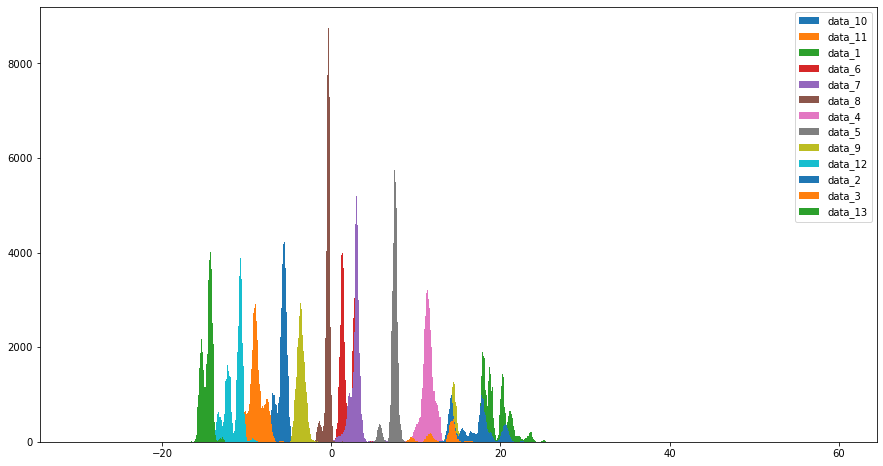

In [2]:
%matplotlib inline 
data_dir = '/Users/jasonyuan/Desktop/Physics/Thesis/Data/Overall/Nov 26'

figure = plt.figure(figsize=(15,8))
ax = figure.add_subplot(1,1,1)
for file in os.listdir(data_dir):
    _, file_extension = os.path.splitext(data_dir + '/' + file)
    if file_extension != '.data':
        continue
    else:
        tof,_,_,_,_ = DAQTools.getTOF([30,22],pd.read_csv(data_dir+'/'+file,sep=';',on_bad_lines='warn'))
        hist, bin_edges = np.histogram(tof,bins=int(DAQTools.Sturge(len(tof))))
        ax.hist(tof,int(DAQTools.Sturge(len(tof)))+1000,range=(-30,60),fill=True,label='data_{}'.format(file.split('.')[0]))

        if file == '8.data':
            print(bin_edges[np.argmax(hist)])

ax.legend()
plt.show()

[[1.    1.    0.37  0.   ]
 [1.    1.    0.148 0.   ]
 [1.    1.    0.37  0.   ]
 ...
 [1.    1.    0.37  0.   ]
 [1.    1.    0.    1.11 ]
 [1.    1.    0.481 0.   ]]


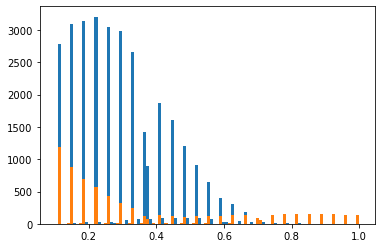

In [15]:
df = pd.read_csv(data_dir+'/8.data',sep=';',on_bad_lines='warn')
# df[['HIT_0_30','HIT_0_22','RELATIVETIME_0_30','RELATIVETIME_0_22']]
np_filter = df[['HIT_0_30','HIT_0_22','RELATIVETIME_0_30','RELATIVETIME_0_22']].to_numpy()
np_filter = np.delete(np_filter,np.where(np_filter[:,0]==0),axis=0)
np_filter = np.delete(np_filter,np.where(np_filter[:,1]==0),axis=0)
print(np_filter)
plt.hist(np_filter[:,2],100,range=(0.1,1),label='Channel 30')
plt.hist(np_filter[:,3],100,range=(0.1,1),label='Channel 22')
plt.show()


Dec 6 Data — Comparing Trace with the ToF calculations

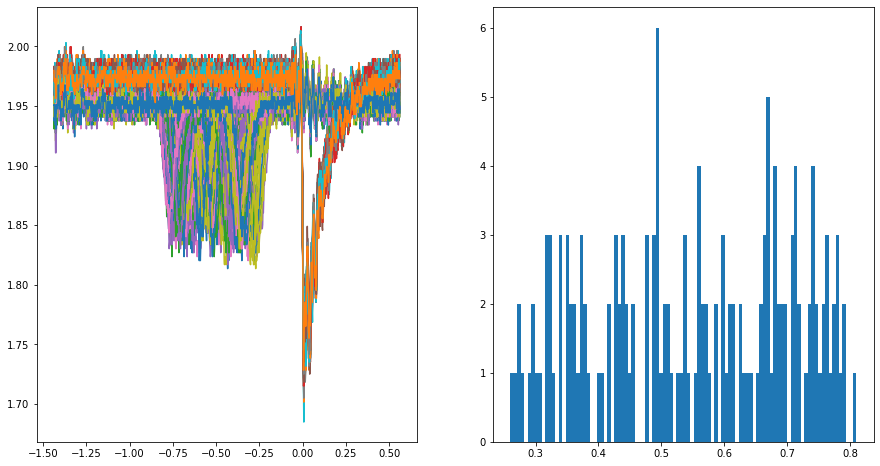

In [2]:
# Process the traces 
trace_pth = "/Users/jasonyuan/Desktop/Physics/Thesis/Data/Overall/Dec 6/MSO-X 4154A Trace Data Log 2022-12-06 16-37-10 2/*.csv"
files = glob.glob(trace_pth)

# --------------------------- TEST SECTION ------------------------------------- #
# # Test one file
# df = pd.read_csv(files[0],skiprows=1)   # Extract just the time column and the columns with VOLT 
# col_names = df.columns.values
# v_counter = 0
# for val in col_names:
#     if 'Time' in val:
#         t_header = val
#     if 'VOLT' in val and v_counter == 0:
#         v_header_1 = val
#         v_counter += 1
#     elif 'VOLT' in val and v_counter == 1:
#         v_header_2 = val
#         v_counter += 1

# sub_df = df.filter([t_header, v_header_1, v_header_2])    
# print(sub_df)
# np_df = sub_df.to_numpy()
# print(np_df[:,1].mean(),np_df[:,1].min())
# print(np_df[:,1].mean() - np_df[:,1].min())

# ---------------------------------------------------------------- #
num_traces = 200
trace_length = 1000
trace1 = []
trace2 = []

for i in range(0, len(files)):
    df = pd.read_csv(files[i],skiprows=1)   # Extract just the time column and the columns with VOLT 
    col_names = df.columns.values
    v_counter = 0
    for val in col_names:
        if 'Time' in val:
            t_header = val
        if 'VOLT' in val and v_counter == 0:
            v_header_1 = val
            v_counter += 1
        elif 'VOLT' in val and v_counter == 1:
            v_header_2 = val
            v_counter += 1

    sub_df = df.filter([t_header, v_header_1, v_header_2])    
    np_df = sub_df.to_numpy()

    if (np_df[:,1].mean() - np_df[:,1].min() > 0.08) and (np_df[:,2].mean() - np_df[:,2].min() > 0.08):
        trace1.append([np.copy(np_df[:,1].T)])
        trace2.append([np.copy(np_df[:,2].T)])

trace1 = np.array(trace1).squeeze()
trace2 = np.array(trace2).squeeze()
t_array = 1e6 * (pd.read_csv(files[0],skiprows=1).filter([t_header]).to_numpy().reshape((-1,)))   # Convert into microseconds
tof_array = []

for n in range(0, trace1.shape[0]):
    t1_min = trace1[n,:].argmin()
    t2_min = trace2[n,:].argmin()
    tof_array.append(t_array[t2_min]-t_array[t1_min])

%matplotlib inline
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
for n in range(0,trace1.shape[0]):
    ax1.plot(t_array,trace1[n,:],label=n)
    ax1.plot(t_array,trace2[n,:],label=n)
n, bins, _ = ax2.hist(tof_array,bins=100)
# plt.plot(t_array,trace2,label='Trace 2')
# plt.legend()
plt.show()


b'Skipping line 6552: expected 336 fields, saw 502\n'


['CH_0_1', 'CH_1_1']


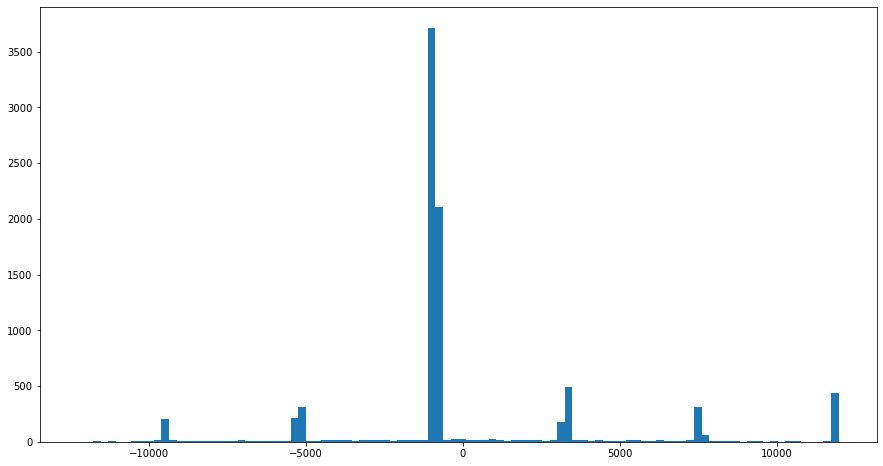

In [2]:
# Process with DAQ data
%matplotlib inline

data_dir = '/Users/jasonyuan/Desktop/Physics/Thesis/Data/Overall/Dec 6/Dec 6 DAQ'
data_1 = data_dir + '/1.data'
data_2 = data_dir + '/2.data'
data_3 = data_dir + '/3.data'

tof_1, coarse_A, coarse_B, fine_A, fine_B = DAQTools.getTOF([],pd.read_csv(data_3,sep=';',on_bad_lines='warn'))
hist_1, bin_edges_1 = np.histogram(tof_1,bins=int(DAQTools.Sturge(len(tof_1))))

# tof_2 = getTOF([30,20],pd.read_csv(data_2,sep=';',on_bad_lines='warn'))
# hist_2, bin_edges_2 = np.histogram(tof_2,bins=int(Sturge(len(tof_2))))

# tof_3 = getTOF([30,20],pd.read_csv(data_3,sep=';',on_bad_lines='warn'))
# hist_3, bin_edges_3 = np.histogram(tof_3,bins=int(Sturge(len(tof_3))))

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
n1, nbins_1, _ = plt.hist(tof_1,100)
# plt.subplot(1,3,2)
# n2, nbins_2, _ = plt.hist(tof_2,int(Sturge(len(tof_2))),range=(-30,60))
# plt.subplot(1,3,3)
# n3, nbins_3, _ = plt.hist(tof_3,int(Sturge(len(tof_3))),range=(-30,60))
plt.show()

In [13]:
idx = n1.argmax()
nbins_1[idx]

-1111.1716844193088

In [3]:
df = pd.read_csv(data_3,sep=';',on_bad_lines='warn')
df.shape

b'Skipping line 6552: expected 336 fields, saw 502\n'


(21096, 336)

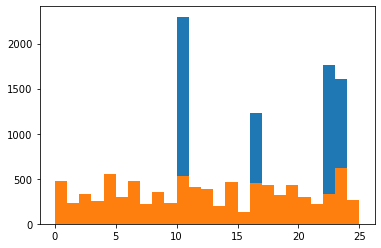

In [17]:
plt.figure()
plt.hist(fine_A,25)
plt.hist(fine_B,25)
plt.show()